In [72]:
import re

def process_line(stdout):
    energy = []
    sign = []
    time = []

    for line in str(stdout).split("\\n"):

        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            
    return energy, sign, time

In [73]:
import os
os.chdir("/Users/keisukemurota/Documents/todo/worms/build")

# original shastry-surtherland model

In [ ]:
# 
out = subprocess.Popen(["./main", "-L", "2", "-T", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "1000000", "-M", "shastry"], 
           stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT)
stdout,stderr = out.communicate()
# print(stdout)

### sampling energies for several temperature

In [76]:
import subprocess
energy_array = []
sign_array = []
time_array = []
T =  np.logspace(-1, 1, num=10)
for t in T:
    out = subprocess.Popen(["./debug", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)

T = 0.1 [-13.9423, 8.96093]
T = 0.16681005372000587 [-11.4215, 12.7359]
T = 0.2782559402207124 [-18.9905, 26.2391]
T = 0.46415888336127786 [-6.25298, 8.65694]
T = 0.774263682681127 [-6.2939, 0.367316]
T = 1.291549665014884 [-4.79773, 0.0519026]
T = 2.1544346900318834 [-3.22141, 0.0296396]
T = 3.593813663804626 [-2.01849, 0.0305186]
T = 5.994842503189409 [-1.21623, 0.037083]
T = 10.0 [-0.737564, 0.0464167]


In [77]:
energy_v1 = np.array(energy_array)
sign_v1 = np.array(sign_array)

## calculate exact value

In [88]:
import numpy as np
E = np.load("../doc/data/shastry_exact.npy")
tmp = np.einsum("i,j->ij",-1/T, E)
energy_exact = np.einsum("j,ij->i",E,np.exp(tmp))/np.einsum("ij->i", np.exp(tmp))

In [89]:
beta = 1/4
np.sum(E * np.exp(-beta*E))/np.sum(np.exp(-beta*E))

-1.8154800874889645

### plot together with exact value

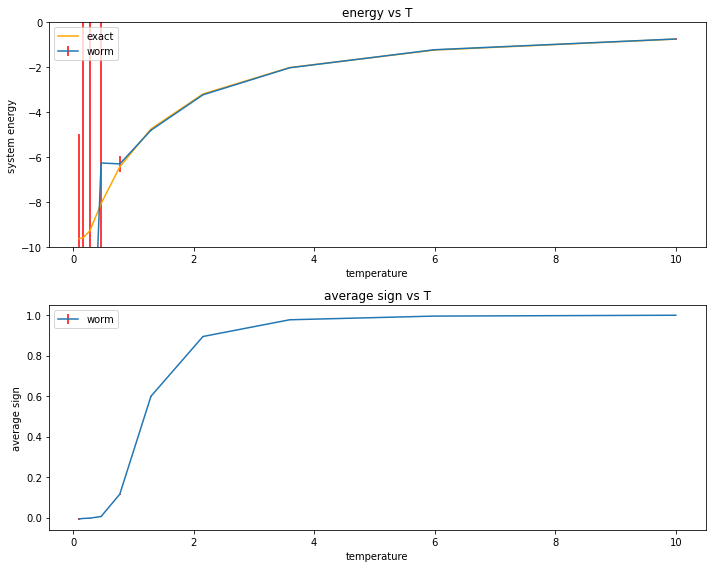

In [90]:
import matplotlib.pyplot as plt
T =  np.logspace(-1, 1, num=10)

fig = plt.figure(figsize = (10,8))
 
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_v1[0:,0], yerr = energy_v1[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title('energy vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_v1[0:,0], yerr = sign_v1[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

# unitary transformed shastry-surtherland model

In [92]:
energy_array = []
sign_array = []
time_array = []
T =  np.logspace(-1, 1, num=10)
for t in T:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
#     print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)

In [93]:
energy_v2 = np.array(energy_array)
sign_v2 = np.array(sign_array)

### plot together with exact value

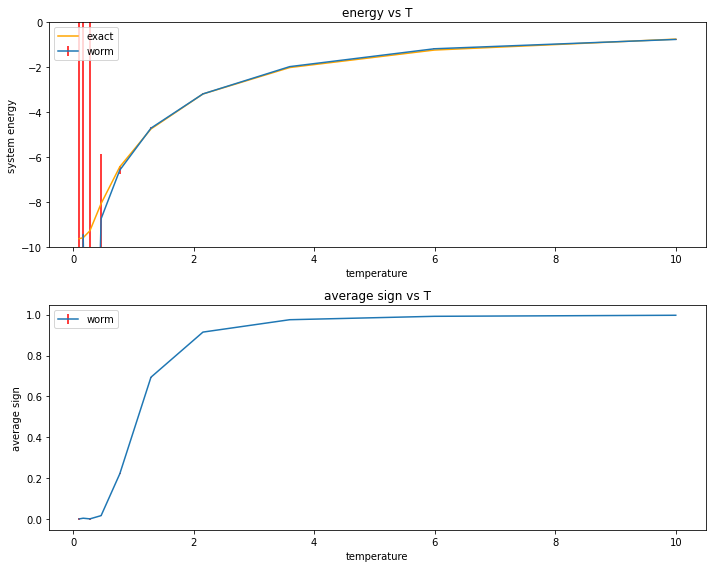

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_v2[0:,0], yerr = energy_v2[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title('energy vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_v2[0:,0], yerr = sign_v2[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

## compare average sign

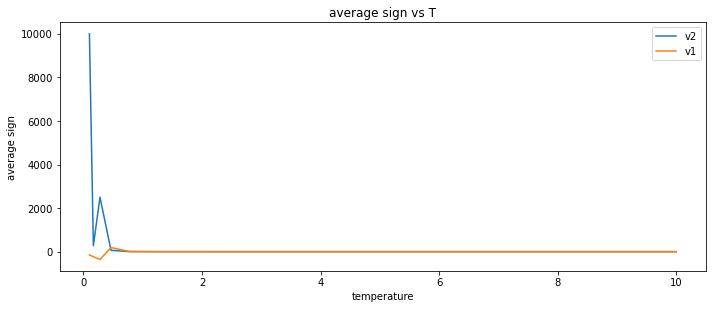

In [103]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(T[0:],1/sign_v2[0:,0],label='v2')
ax1.plot(T[0:],1/sign_v1[0:,0],label='v1')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

# change J1 with fixed temperature (T = 1)

In [55]:
J1 = np.linspace(0, 5, 51)

In [69]:
import subprocess
energy_array = []
sign_array = []
time_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "1", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
energy_j_v1 = np.array(energy_array)
sign_j_v1 = np.array(sign_array)
time_j_v1 = np.array(time_array)

J1 = 0.0 [-1.82126, 0.012574]
J1 = 0.1 [-1.83591, 0.0131486]
J1 = 0.2 [-1.92589, 0.0143612]
J1 = 0.30000000000000004 [-2.03139, 0.016113]
J1 = 0.4 [-2.30722, 0.019234]
J1 = 0.5 [-2.65393, 0.0235705]
J1 = 0.6000000000000001 [-3.02632, 0.0307599]
J1 = 0.7000000000000001 [-3.49681, 0.0402296]
J1 = 0.8 [-4.0879, 0.0551157]
J1 = 0.9 [-4.83705, 0.0771427]
J1 = 1.0 [-5.59795, 0.111282]
J1 = 1.1 [-6.59635, 0.153533]
J1 = 1.2000000000000002 [-7.60997, 0.213313]
J1 = 1.3 [-8.50768, 0.280464]
J1 = 1.4000000000000001 [-10.1861, 0.398138]
J1 = 1.5 [-11.1734, 0.505106]
J1 = 1.6 [-12.9487, 0.655527]
J1 = 1.7000000000000002 [-14.0022, 0.732247]
J1 = 1.8 [-15.8928, 0.983296]
J1 = 1.9000000000000001 [-16.8645, 1.07753]
J1 = 2.0 [-18.384, 1.24557]
J1 = 2.1 [-19.887, 1.33829]
J1 = 2.2 [-21.2328, 1.508]
J1 = 2.3000000000000003 [-22.4709, 1.71316]
J1 = 2.4000000000000004 [-23.8954, 1.65307]
J1 = 2.5 [-24.8908, 1.84577]
J1 = 2.6 [-26.9049, 2.2264]
J1 = 2.7 [-27.295, 2.06958]
J1 = 2.8000000000000003 [-28.8987

In [68]:
import subprocess
energy_array = []
sign_array = []
time_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "1", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
energy_j_v2 = np.array(energy_array)
sign_j_v2 = np.array(sign_array)
time_j_v2 = np.array(time_array)

J1 = 0.0 [-1.81021, 0.00760378]
J1 = 0.1 [-1.82324, 0.00817686]
J1 = 0.2 [-1.93357, 0.00880238]
J1 = 0.30000000000000004 [-2.09358, 0.00962516]
J1 = 0.4 [-2.2797, 0.0107338]
J1 = 0.5 [-2.61105, 0.0125554]
J1 = 0.6000000000000001 [-3.06296, 0.0158431]
J1 = 0.7000000000000001 [-3.52321, 0.0206842]
J1 = 0.8 [-4.13089, 0.0292786]
J1 = 0.9 [-4.77532, 0.0428758]
J1 = 1.0 [-5.60779, 0.0675375]
J1 = 1.1 [-6.54681, 0.104261]
J1 = 1.2000000000000002 [-7.42664, 0.167655]
J1 = 1.3 [-8.65385, 0.277437]
J1 = 1.4000000000000001 [-9.93514, 0.472206]
J1 = 1.5 [-11.0083, 0.746265]
J1 = 1.6 [-11.7647, 1.12981]
J1 = 1.7000000000000002 [-13.5324, 1.73365]
J1 = 1.8 [-17.1987, 2.0641]
J1 = 1.9000000000000001 [-16.7915, 3.48907]
J1 = 2.0 [-17.9655, 4.32955]
J1 = 2.1 [-16.8053, 8.62439]
J1 = 2.2 [-17.8609, 15.0001]
J1 = 2.3000000000000003 [-17.0177, 9.57929]
J1 = 2.4000000000000004 [-6.78765, 60.4454]
J1 = 2.5 [-26.3943, 19.3439]
J1 = 2.6 [-32.871, 23.9301]
J1 = 2.7 [49.85, 199.054]
J1 = 2.8000000000000003 [-2